In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
이혼통계 = 'C:/Users/COM/Desktop/이혼통계/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
이혼사유1 = pd.read_csv(이혼통계+'연령_5세__이혼사유별_이혼_20191205180052.csv', encoding='cp949')

In [7]:
이혼사유1

,성별,연령별,계,배우자 부정,정신적육체적 학대,가족간 불화,경제문제,성격차이,건강문제,기타,미상
0,남편,계,109153,8016,4172,8017,12126,50406,639,22766,3011
1,남편,15세 미만,0,0,0,0,0,0,0,0,0
2,남편,15 - 19세,31,2,3,2,3,10,1,6,4
3,남편,20 - 24세,1067,57,43,102,69,548,4,218,26
4,남편,25 - 29세,3295,262,127,297,198,1675,10,652,74
5,남편,30 - 34세,9904,826,323,746,648,5149,29,1988,195
6,남편,35 - 39세,14691,1133,508,1090,1314,7286,59,2999,302
7,남편,40 - 44세,19510,1476,697,1500,2182,9025,83,4107,440
8,남편,45 - 49세,20273,1356,725,1417,2681,9285,96,4154,559
9,남편,50 - 54세,17183,1248,749,1173,2272,7521,114,3624,482


In [15]:
남편 = 이혼사유1.loc[이혼사유1.성별=='남편'].drop([0,15],axis=0)
아내 = 이혼사유1.loc[이혼사유1.성별=='아내'].drop([16,31], axis=0)

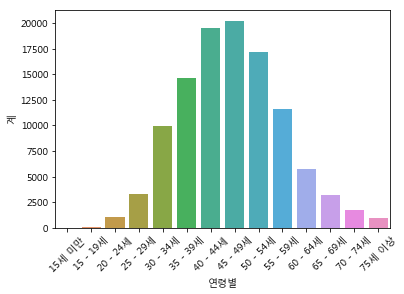

In [31]:
ax = sns.barplot(x='연령별' ,y ='계',data=남편)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

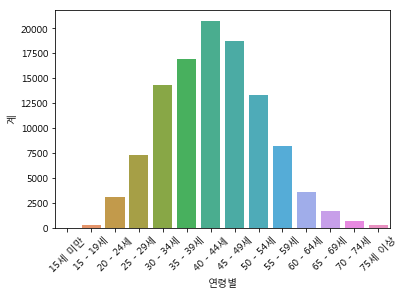

In [30]:
ax = sns.barplot(x='연령별' ,y ='계',data=아내)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [83]:
혼인지속기간연령 = pd.read_csv(이혼통계 + '연령5세_혼인지속기간_동거기간_별_이혼_20191206093305.csv',encoding='cp949')
혼인지속기간연령

,연령별,동거기간별,남편,아내
0,계,계,109153,109153
1,계,1년 미만,4183,4183
2,계,1년,5662,5662
3,계,2년,5277,5277
4,계,3년,4878,4878
...,...,...,...,...
283,미상,20년 이상,0,0
284,미상,20∼24년,0,0
285,미상,25∼29년,0,0
286,미상,30년 이상,0,0


In [81]:
혼인지속기간별 = 혼인지속기간연령.groupby('동거기간별').sum().reset_index()
혼인지속기간별.drop([16,17], axis=0, inplace=True)
혼인지속기간별.동거기간별 = [1014,1519,1,0,2024,None,2529,2,3000,3,4,5,6,7,8,9]
혼인지속기간별.sort_values(by='동거기간별')

,동거기간별,남편,아내
3,0.0,8366,8366
2,1.0,11324,11324
7,2.0,10554,10554
9,3.0,9756,9756
10,4.0,9332,9332
11,5.0,9736,9736
12,6.0,8232,8232
13,7.0,8612,8612
14,8.0,7838,7838
15,9.0,7174,7174


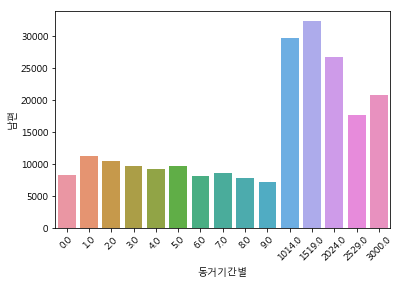

In [85]:
ax = sns.barplot(x='동거기간별' ,y ='남편',data=혼인지속기간별)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()